# PIL Pillow 影像處理

In [1]:
import numpy as np
from PIL import Image, ImageFilter, ImageDraw, ImageFont
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
# 線性調整
def project(arr, low=0, high=255): # 1D正規化  將分布投影到 0~255(low~high) 原 min value 和 max value 投影至 0~255
    armin = arr.min()
    armax = arr.max()
    ar = ((high - low) * ((arr - armin)/(armax - armin))) + low
    return ar

def project2(arr, in_l=0, in_h=255, out_l=0, out_h=255): # 1D正規化 原arr 設定 min value 和 max value 投影至 0~255
    ar = ((out_h - out_l) * ((arr - in_l)/(in_h - in_l))) + out_l
    ar = overval(ar)
    return ar

# 明暗限制
def overval(arr, low=0, high=255): # 過亮 過暗  把過高過低 value 給過濾掉
    return np.minimum(np.maximum(arr, low), high)

# 非線性調整
def power_law(arr, r=1): # 指數型式
    ar = arr**r
    return project(ar)

def log_(arr, r=1): # 對數型式
    ar = np.log(1 + (r * arr))
    return project(ar)

def exp_(arr, r=1): # 指數型式
    ar = np.exp(arr / r)
    return project(ar)

# 顯示圖片
def show_(arr):
    return Image.fromarray(np.uint8(arr))

## 讀入黨案

In [3]:
p1 = Image.open("p01.jpg").resize((450, 300))
p2 = Image.open("p02.png")
p3 = Image.open("p03.jpg")
p4 = Image.open("p04.jpg")
p5 = Image.open("p05.png")

#### p1.show() #顯示出來  標準版show()效率不高，它將圖像保存到臨時文件再調用 用電腦內建程式開啟
#### p1 # jupyter可以直接顯示
#### p.format(圖片格式), p.size(圖片畫素), p.mode(色彩模式)

In [4]:
lst = [p1, p2, p3, p4, p5] # 相關資料
for p in lst:
    print(p.format, p.size, p.mode)

None (450, 300) RGB
PNG (491, 600) RGB
JPEG (960, 634) RGB
JPEG (1272, 920) RGB
PNG (600, 564) RGBA


### 儲存檔案

In [5]:
# p1.save('p1.png')

### 轉換圖像格式 ( 1，L，P，RGB，RGBA，CMYK，YCbCr，I，F )
#### ( L = R * 299/1000 + G * 587/1000 + B * 114/1000 )

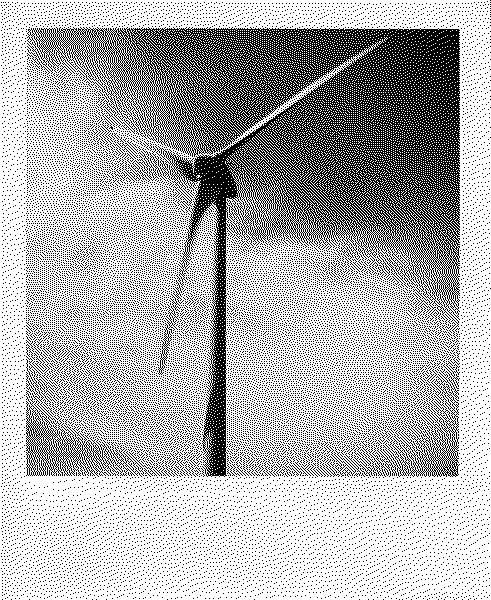

In [6]:
p2.convert('1')

## 圖像處理

### 旋轉

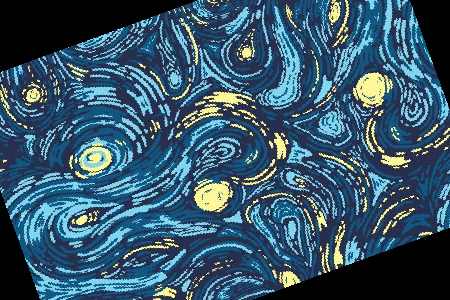

In [7]:
rp1 = p1.rotate(20)
rp1

### 裁切

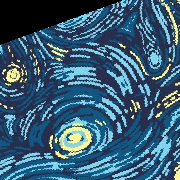

In [8]:
rp1.crop([20, 20, 200, 200])

### 重疊(透明度)

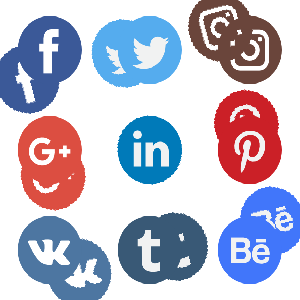

In [9]:
p5 = p5.resize((300, 300))
rp5 = p5.rotate(15)
Image.alpha_composite(rp5, p5) #覆蓋重疊  只能是png RGBA格式

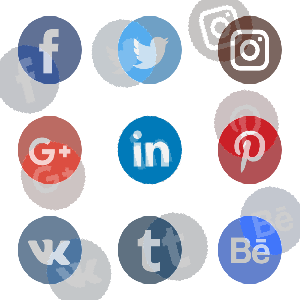

In [10]:
Image.blend(rp5, p5, alpha=0.75) #覆蓋重疊 + alpha(透明度)

## PIL 濾鏡(ImageFilter)

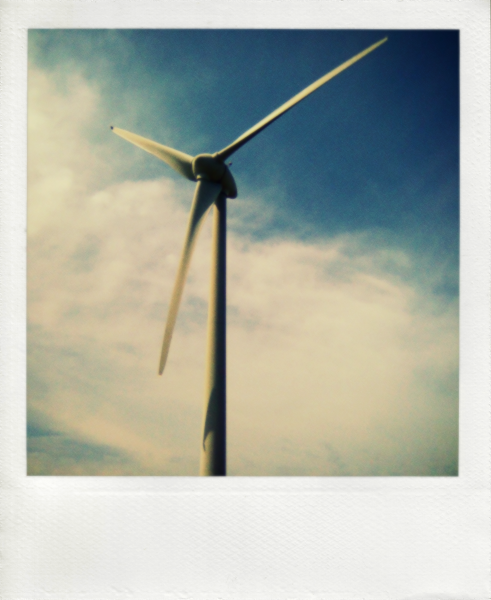

In [11]:
p2.filter(ImageFilter.SMOOTH_MORE)

## 轉換成 Numpy Array

arr.dtype : uint8
arr.shape : (400, 600, 3)


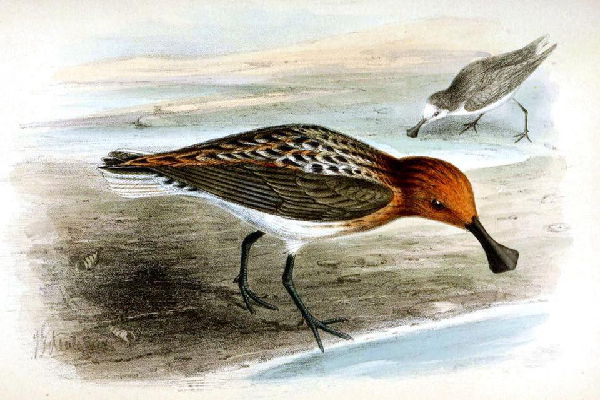

In [12]:
arr = np.array(p3.resize((600, 400)))
print('arr.dtype :', arr.dtype)
print('arr.shape :', arr.shape)
show_(arr)

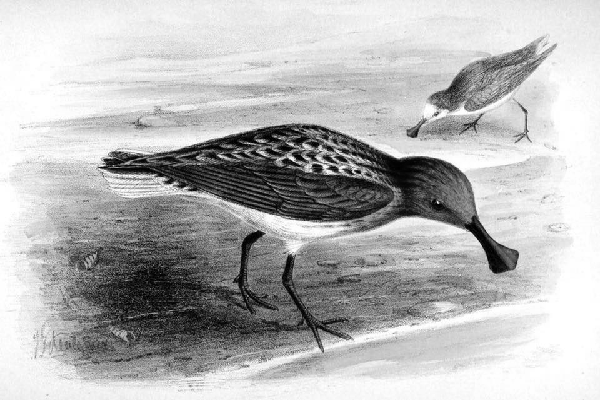

In [13]:
arr = np.array(p3.convert('L').resize((600, 400))).astype(np.float)
show_(arr) # 取灰階 array

## Power-Law Transformations 調整亮度(Gamma曲線)

(0, 255)

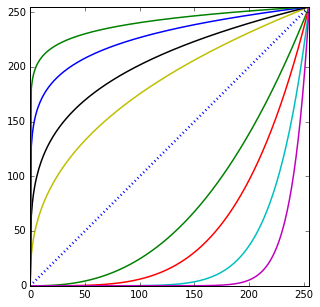

In [14]:
x = np.linspace(0, 255, 256)
plt.figure(figsize=(5, 5))
plt.plot(x, power_law(x, r=1), ':', linewidth=2.5)
plt.plot(x, power_law(x, r=2.5), linewidth=1.5)
plt.plot(x, power_law(x, r=2**2), linewidth=1.5)
plt.plot(x, power_law(x, r=2**3), linewidth=1.5)
plt.plot(x, power_law(x, r=2**4), linewidth=1.5)
plt.plot(x, power_law(x, r=1/2.5), linewidth=1.5)
plt.plot(x, power_law(x, r=1/(2**2)), linewidth=1.5)
plt.plot(x, power_law(x, r=1/(2**3)), linewidth=1.5)
plt.plot(x, power_law(x, r=1/(2**4)), linewidth=1.5)
plt.xlim(0, 255)
plt.ylim(0, 255)

## 指數 對數 log exp Transformations 調整亮度(Gamma曲線)

(0, 255)

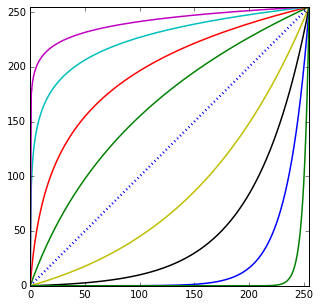

In [15]:
plt.figure(figsize=(5, 5))
plt.plot(x, power_law(x, r=1), ':', linewidth=2.5)
plt.plot(x, log_(x, r=0.02), linewidth=1.5)
plt.plot(x, log_(x, r=0.2), linewidth=1.5)
plt.plot(x, log_(x, r=20), linewidth=1.5)
plt.plot(x, log_(x, r=200000), linewidth=1.5)
plt.plot(x, exp_(x, r=120), linewidth=1.5)
plt.plot(x, exp_(x, r=50), linewidth=1.5)
plt.plot(x, exp_(x, r=20), linewidth=1.5)
plt.plot(x, exp_(x, r=5), linewidth=1.5)
plt.xlim(0, 255)
plt.ylim(0, 255)

r : 1


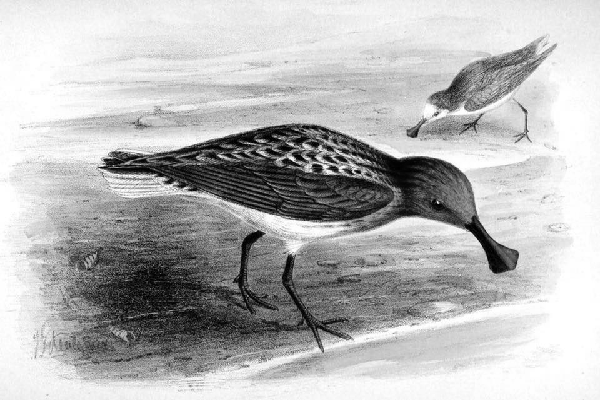

In [16]:
r = 1 # r<1 整體變亮   r>1 整體變暗
print('r :', r)
show_(power_law(arr, r))

r : 0.5


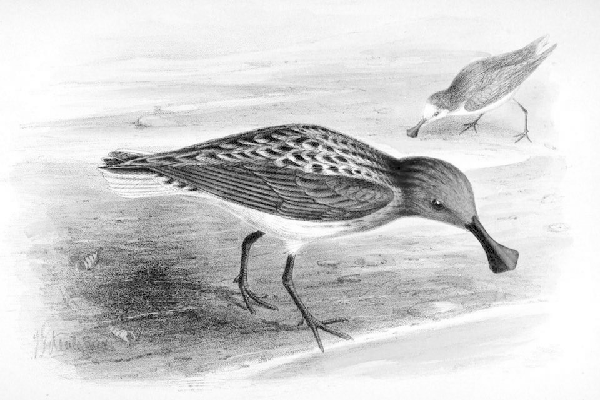

In [17]:
r = 0.5 # r<1 整體變亮   r>1 整體變暗
print('r :', r)
show_(power_law(arr, r))

r : 1.8


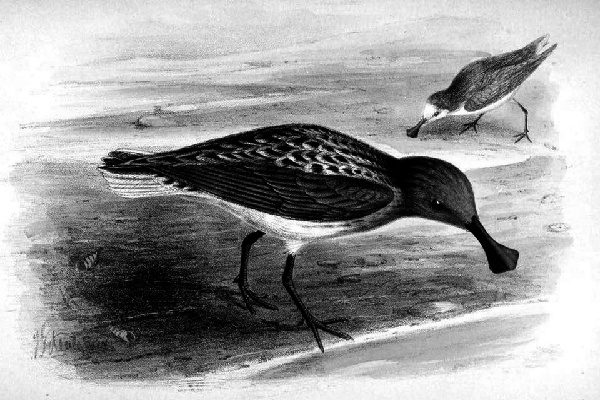

In [18]:
r = 1.8 # r<1 整體變亮   r>1 整體變暗
print('r :', r)
show_(power_law(arr, r))

## 亮度投影

in_max: 255.0
in_min: 0.0
out_max: 50
out_min: 200


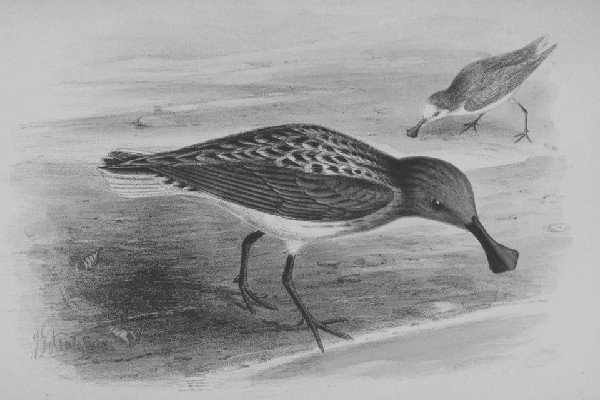

In [19]:
print('in_max:', arr.max())
print('in_min:', arr.min())
print('out_max:', 50)
print('out_min:', 200)
ar = project(arr, 50, 200) # 正規化  將分布投影到 0~255
show_(ar)

### 投影255~0 就變成反白

in_max: 255.0
in_min: 0.0
out_max: 50
out_min: 200


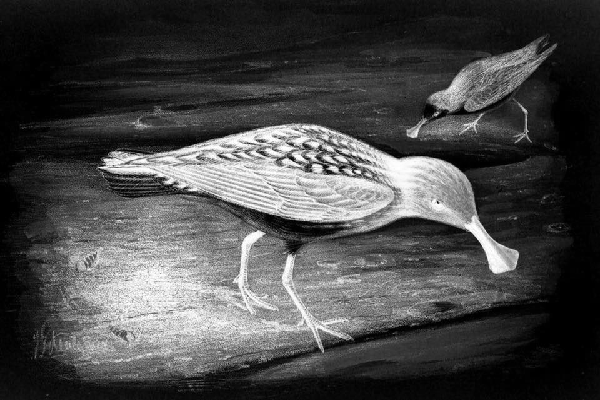

In [20]:
print('in_max:', arr.max())
print('in_min:', arr.min())
print('out_max:', 50)
print('out_min:', 200)
ar = project(arr, 255, 0)  # 正規化  將分布投影到 255~0
show_(ar)

### 創造新圖

In [21]:
arr = np.linspace(0, 255, 256) * np.ones(shape=[256, 256])
arr = np.pad(arr, pad_width=((1, 1), (1, 1)), mode='constant', constant_values=0) #給出黑框

(258, 258)


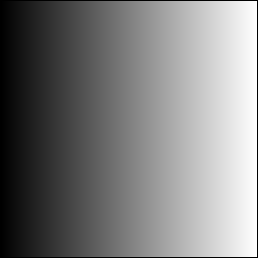

In [22]:
print(arr.shape)
show_(arr) #dtype 轉成 uint8 

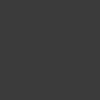

In [23]:
pp = Image.new('RGB', [100, 100], color=(60, 60, 60))
ar = np.array(pp)
pp

In [24]:
pp.save('df.png')

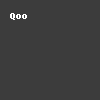

In [25]:
font = ImageFont.load_default()
dr = ImageDraw.Draw(pp)
dr.text((10, 10), 'Qoo', font=font)
pp